In [2]:
import os
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import cv2
import numpy as np 
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

In [2]:
minmaxscaler = MinMaxScaler()


In [3]:
dataset_root_folder = "/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset"
image_patch_size = 256

In [4]:
for path,subdirs,files in os.walk(dataset_root_folder):
    dirname = path.split(os.path.sep)[-1]
    print(dirname)

Semantic segmentation dataset
Tile 8
images
masks
Tile 1
images
masks
Tile 6
images
masks
Tile 7
images
masks
Tile 5
images
masks
Tile 2
images
masks
Tile 3
images
masks
Tile 4
images
masks


In [5]:
for path,subdirs,files in os.walk(dataset_root_folder):
    dirname = path.split(os.path.sep)[-1]
    # print(dirname)
    if dirname=="images":
        images = os.listdir(path)
        # print(images)
        for i, image_name in enumerate(images):
            if(image_name.endswith(".jpg")):
                print(image_name)

image_part_004.jpg
image_part_005.jpg
image_part_007.jpg
image_part_006.jpg
image_part_002.jpg
image_part_003.jpg
image_part_001.jpg
image_part_008.jpg
image_part_009.jpg
image_part_004.jpg
image_part_005.jpg
image_part_007.jpg
image_part_006.jpg
image_part_002.jpg
image_part_003.jpg
image_part_001.jpg
image_part_008.jpg
image_part_009.jpg
image_part_004.jpg
image_part_005.jpg
image_part_007.jpg
image_part_006.jpg
image_part_002.jpg
image_part_003.jpg
image_part_001.jpg
image_part_008.jpg
image_part_009.jpg
image_part_004.jpg
image_part_005.jpg
image_part_007.jpg
image_part_006.jpg
image_part_002.jpg
image_part_003.jpg
image_part_001.jpg
image_part_008.jpg
image_part_009.jpg
image_part_004.jpg
image_part_005.jpg
image_part_007.jpg
image_part_006.jpg
image_part_002.jpg
image_part_003.jpg
image_part_001.jpg
image_part_008.jpg
image_part_009.jpg
image_part_004.jpg
image_part_005.jpg
image_part_007.jpg
image_part_006.jpg
image_part_002.jpg
image_part_003.jpg
image_part_001.jpg
image_part_0

In [6]:
image = cv2.imread("/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg")

In [7]:
image.shape

(644, 797, 3)

In [8]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(643, 797, 3) --- 768 - 512
(643, 797, 3) --- 768 - 512
(643, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512


[ WARN:0@6.571] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6.571] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6.571] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6.571] global /Users/xper

(544, 509, 3) --- 256 - 512
(544, 510, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 510, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 510, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(1058, 1126, 3) --- 1024 - 1024


[ WARN:0@7.153] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 4/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.153] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 4/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.153] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 4/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.153] global /Users/xper

(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024
(1058, 1126, 3) --- 1024 - 1024


[ WARN:0@7.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 5/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 5/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.642] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 5/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.642] global /Users/xper

(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(2061, 1817, 3) --- 1792 - 2048


[ WARN:0@7.933] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 6/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.933] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 6/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.933] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 6/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.933] global /Users/xper

(2061, 1816, 3) --- 1792 - 2048
(2061, 1817, 3) --- 1792 - 2048
(2062, 1817, 3) --- 1792 - 2048
(2062, 1816, 3) --- 1792 - 2048
(2062, 1817, 3) --- 1792 - 2048
(2061, 1817, 3) --- 1792 - 2048
(2061, 1816, 3) --- 1792 - 2048
(2061, 1817, 3) --- 1792 - 2048


[ WARN:0@9.659] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 7/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.659] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 7/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.659] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 7/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.659] global /Users/xper

(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(643, 797, 3) --- 768 - 512
(643, 797, 3) --- 768 - 512
(643, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(644, 797, 3) --- 768 - 512
(544, 509, 3) --- 256 - 512
(544, 510, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 510, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(544, 510, 3) --- 256 - 512
(544, 509, 3) --- 256 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(658, 682, 3) --- 512 - 512
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846, 1099, 3) --- 1024 - 768
(846

[ WARN:0@9.905] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 4/masks/image_part_0010.png'): can't open/read file: check file path/integrity
[ WARN:0@9.905] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 4/masks/image_part_0011.png'): can't open/read file: check file path/integrity
[ WARN:0@9.906] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 4/masks/image_part_0012.png'): can't open/read file: check file path/integrity
[ WARN:0@9.906] global /Users/xperien

(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(838, 859, 3) --- 768 - 768
(2061, 1817, 3) --- 1792 - 2048
(2061, 1816, 3) --- 1792 - 2048


[ WARN:0@10.156] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 6/masks/image_part_0010.png'): can't open/read file: check file path/integrity
[ WARN:0@10.156] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 6/masks/image_part_0011.png'): can't open/read file: check file path/integrity
[ WARN:0@10.156] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 6/masks/image_part_0012.png'): can't open/read file: check file path/integrity
[ WARN:0@10.156] global /Users/xpe

(2061, 1817, 3) --- 1792 - 2048
(2062, 1817, 3) --- 1792 - 2048
(2062, 1816, 3) --- 1792 - 2048
(2062, 1817, 3) --- 1792 - 2048
(2061, 1817, 3) --- 1792 - 2048
(2061, 1816, 3) --- 1792 - 2048
(2061, 1817, 3) --- 1792 - 2048


[ WARN:0@10.640] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 7/masks/image_part_0010.png'): can't open/read file: check file path/integrity
[ WARN:0@10.640] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 7/masks/image_part_0011.png'): can't open/read file: check file path/integrity
[ WARN:0@10.640] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/jarvis/pymycod/segmentation_sattelite_img/Semantic segmentation dataset/Tile 7/masks/image_part_0012.png'): can't open/read file: check file path/integrity
[ WARN:0@10.640] global /Users/xpe

In [40]:
print(len(image_dataset))
print(len(mask_dataset))


945
945


In [41]:

image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

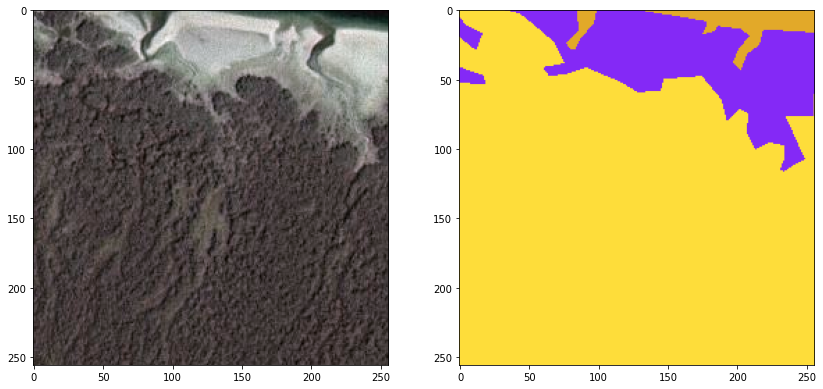

In [42]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [43]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [44]:
label = individual_patched_mask


In [45]:

def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [46]:

labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [47]:


labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [48]:


np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [49]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


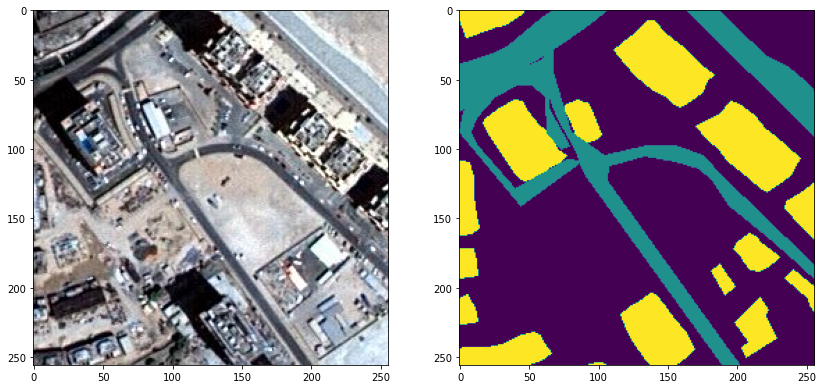

In [50]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [51]:
total_classes = len(np.unique(labels))

In [52]:

total_classes

6

In [53]:

from tensorflow.keras.utils import to_categorical 

In [54]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [55]:


master_trianing_dataset = image_dataset

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


In [58]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [59]:

image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [60]:

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [61]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda
     

In [62]:
from keras import backend as K

In [63]:

def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [64]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [65]:
metrics = ["accuracy", jaccard_coef]

In [66]:

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [67]:

def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [68]:
model = get_deep_learning_model()

2023-10-19 21:16:25.093634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-19 21:16:25.095287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [69]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [70]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [71]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [72]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [73]:


total_loss = dice_loss + (1 * focal_loss)

In [74]:

import tensorflow as tf

In [75]:


tf.keras.backend.clear_session()

In [76]:

model.compile(optimizer="adam", loss=total_loss, metrics=metrics)
     

In [77]:


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [78]:

model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

2023-10-19 21:17:58.350025: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2023-10-19 21:18:01.182707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x256x256x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x256x256x6x

50/51 [============================>.] - ETA: 0s - loss: 1.0056 - accuracy: 0.5264 - jaccard_coef: 0.2368

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<3x256x256x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<3x256x256x6xi1>'


51/51 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.5272 - jaccard_coef: 0.2403

2023-10-19 21:19:00.184008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 71s 1s/step - loss: 1.0055 - accuracy: 0.5272 - jaccard_coef: 0.2403 - val_loss: 0.9930 - val_accuracy: 0.6022 - val_jaccard_coef: 0.2552
Epoch 2/100
51/51 [==============================] - 29s 570ms/step - loss: 0.9898 - accuracy: 0.6368 - jaccard_coef: 0.3316 - val_loss: 0.9901 - val_accuracy: 0.6579 - val_jaccard_coef: 0.2528
Epoch 3/100
51/51 [==============================] - 29s 563ms/step - loss: 0.9753 - accuracy: 0.6913 - jaccard_coef: 0.3963 - val_loss: 0.9680 - val_accuracy: 0.6865 - val_jaccard_coef: 0.3629
Epoch 4/100
51/51 [==============================] - 32s 618ms/step - loss: 0.9579 - accuracy: 0.7333 - jaccard_coef: 0.4724 - val_loss: 0.9620 - val_accuracy: 0.7144 - val_jaccard_coef: 0.4418
Epoch 5/100
51/51 [==============================] - 32s 625ms/step - loss: 0.9520 - accuracy: 0.7448 - jaccard_coef: 0.4991 - val_loss: 0.9784 - val_accuracy: 0.6569 - val_jaccard_coef: 0.3816
Epoch 6/100
51/51 [==========================

In [79]:


history_a = model_history

In [80]:
history_a.history


{'loss': [1.0055010318756104,
  0.9898267984390259,
  0.975271463394165,
  0.9578757286071777,
  0.9520086646080017,
  0.9495247602462769,
  0.9465461373329163,
  0.9437103271484375,
  0.9408100247383118,
  0.9375267028808594,
  0.9375687837600708,
  0.9321144819259644,
  0.9331973791122437,
  0.926889181137085,
  0.924842894077301,
  0.9319051504135132,
  0.9237239956855774,
  0.9215862154960632,
  0.9195550680160522,
  0.9179641008377075,
  0.9157651662826538,
  0.9141703844070435,
  0.9128424525260925,
  0.9113895893096924,
  0.9093034863471985,
  0.9083566665649414,
  0.907891035079956,
  0.9075934290885925,
  0.9073586463928223,
  0.909947395324707,
  0.9073956608772278,
  0.9011482000350952,
  0.9006692171096802,
  0.9019788503646851,
  0.902999758720398,
  0.9020535349845886,
  0.8997785449028015,
  0.8965739607810974,
  0.8942669630050659,
  0.8972750306129456,
  0.892026960849762,
  0.8931625485420227,
  0.8892606496810913,
  0.8874155282974243,
  0.8872321248054504,
  0.88967

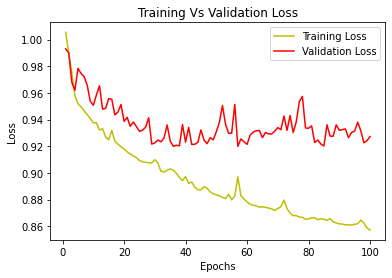

In [81]:

loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

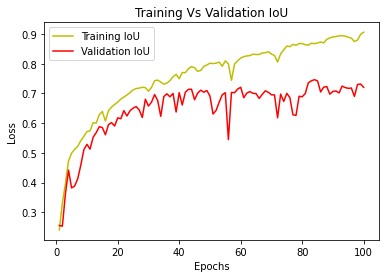

In [82]:

jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [83]:

model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [84]:

y_pred = model.predict(X_test)

2023-10-19 22:29:30.954258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 9s 1s/step


In [85]:

len(y_pred)
     

142

In [86]:

y_pred

array([[[[7.38643110e-03, 8.38610709e-01, 1.13112070e-01,
          2.01791897e-02, 2.00880636e-02, 6.23556203e-04],
         [9.05143446e-04, 9.18386281e-01, 6.86549470e-02,
          8.38867016e-03, 3.60791362e-03, 5.70318880e-05],
         [8.23855400e-04, 8.55780542e-01, 1.12984233e-01,
          2.64074728e-02, 3.92743805e-03, 7.64605502e-05],
         ...,
         [3.60235828e-03, 9.75253403e-01, 8.14252906e-03,
          3.69782955e-03, 9.17517859e-03, 1.28694752e-04],
         [4.18640766e-03, 9.58474040e-01, 1.77210756e-02,
          6.73019513e-03, 1.27130561e-02, 1.75128225e-04],
         [2.02401523e-02, 8.41760516e-01, 6.71338141e-02,
          2.53009256e-02, 4.36380133e-02, 1.92659453e-03]],

        [[1.16474379e-03, 8.78128946e-01, 1.05251171e-01,
          1.23741925e-02, 3.00199469e-03, 7.89435653e-05],
         [8.41563306e-05, 9.32030678e-01, 6.44880608e-02,
          3.07215052e-03, 3.21774132e-04, 3.27709790e-06],
         [5.73473044e-05, 9.12079453e-01, 7.6742

In [87]:

y_pred_argmax = np.argmax(y_pred, axis=3)

In [88]:


len(y_pred_argmax)

142

In [89]:


y_pred_argmax
     

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 3, 1, 1],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [90]:


y_test_argmax = np.argmax(y_test, axis=3)

In [91]:


import random


In [92]:

test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]
     

1/1 [==============================] - 4s 4s/step


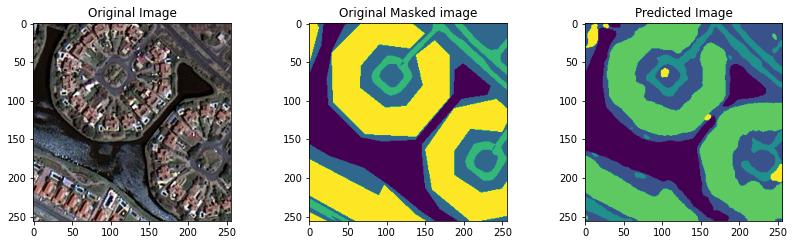

In [93]:

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [94]:


model.save("/Users/jarvis/pymycod/segmentation_sattelite_img/model_satellite_segmentation_full.h5")

In [9]:
model1 = load_model("/Users/jarvis/pymycod/segmentation_sattelite_img/model_semantic_seg.h5",compile=False)

In [11]:

image = cv2.imread('/Users/jarvis/pymycod/segmentation_sattelite_img/LEVIR-CD+/train/A/train_509.png',1)
image = cv2.resize(image, (256, 256))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image)

image_test = Image.fromarray(image)

test_image_input = np.expand_dims(image, 0)

prediction = model1.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


2023-10-25 16:39:33.148452: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-25 16:39:33.300341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


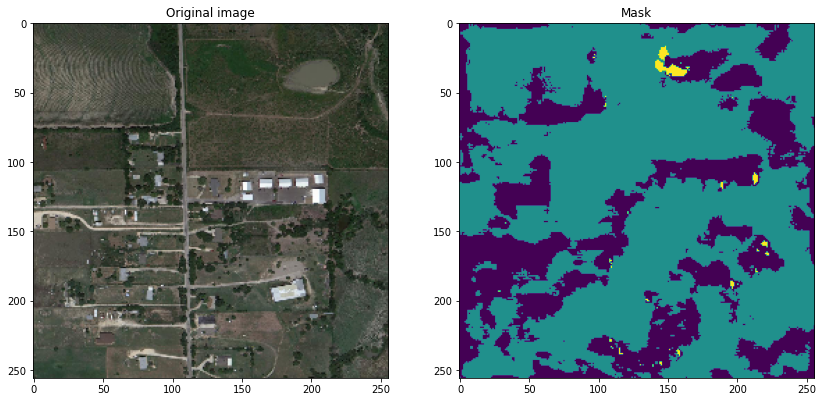

In [12]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.title("Original image")
plt.imshow(image_test)
plt.subplot(122)
plt.title("Mask")
plt.imshow(predicted_image)